<a href="https://colab.research.google.com/github/rojinadeuja/NLP-Deep-Learning/blob/main/CNN-Sentiment-Analysis-Moview-Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Required Modules

In [1]:
import keras
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Activation
from keras.layers import Embedding, Conv1D, SpatialDropout1D, GlobalMaxPool1D
from keras.callbacks import ModelCheckpoint
import os
import sklearn.metrics
from sklearn.metrics import roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Set Hyperparameters

In [3]:
output_dir = '/content/drive/My Drive/Colab Notebooks/'
epochs = 4
batch_size = 128
n_dim = 64
n_unique_words = 5000
n_words_to_skip = 50
max_review_length = 200
pad_type = trunc_type = 'pre'
drop_embed = 0.2
n_dense = 256
dropout = 0.2
n_conv = 256
k_conv = 3

## Load and Pre-process Data

In [4]:
(X_train, y_train), (X_valid, y_valid) = imdb.load_data(num_words=n_unique_words)
X_train = pad_sequences(X_train, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)
X_valid = pad_sequences(X_valid, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)

17465344/17464789 [==============================] - 0s 0us/step


## Design Convolution Network Architecture

In [5]:
model = Sequential()
model.add(Embedding(n_unique_words, n_dim, input_length=max_review_length))
model.add(SpatialDropout1D(drop_embed))
model.add(Conv1D(n_conv, k_conv, activation='relu'))
model.add(GlobalMaxPool1D())
model.add(Dense(n_dense, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(1, activation='sigmoid'))

## Check Model Summary

In [6]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 64)           320000    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 200, 64)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 198, 256)          49408     
_________________________________________________________________
global_max_pooling1d (Global (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               65792     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2

## Create Model Checkpoint

In [7]:
modelcheckpoint = ModelCheckpoint(filepath=output_dir+'/weights.{epoch:02d}.hdf5')
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

## Compile the Model

In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Train Model

In [9]:
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=.20, callbacks=[modelcheckpoint])

Epoch 1/4
157/157 [==============================] - 35s 221ms/step - loss: 0.5424 - accuracy: 0.6938 - val_loss: 0.3342 - val_accuracy: 0.8556
Epoch 2/4
157/157 [==============================] - 35s 222ms/step - loss: 0.2795 - accuracy: 0.8818 - val_loss: 0.2815 - val_accuracy: 0.8838
Epoch 3/4
157/157 [==============================] - 34s 220ms/step - loss: 0.1906 - accuracy: 0.9263 - val_loss: 0.2856 - val_accuracy: 0.8910
Epoch 4/4
157/157 [==============================] - 35s 221ms/step - loss: 0.1242 - accuracy: 0.9556 - val_loss: 0.3084 - val_accuracy: 0.8884


## Load best weights and Predict

In [10]:
# In my case it was the fourth one: 'weights.04.hdf5'
model.load_weights(output_dir+'/weights.04.hdf5')

y_hat = model.predict(X_valid)

## Plot a Histogram based on Predictions

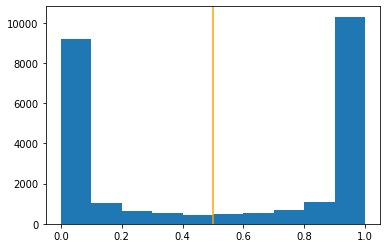

In [11]:
# Plot the predicted probabilities
plt.hist(y_hat)
_ = plt.axvline(x=0.5, color='orange')